In [32]:
import numpy as np
import scipy.integrate as integrate
from scipy.stats import norm
from scipy.stats import cauchy
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
def f(x):
    return np.abs(np.sin(2*np.pi*x)**5-2*np.cos(3*np.cos(x/np.pi)**2)**3)

In [13]:
def montecarlo(f,a,b,nsample,N=1):
    x = np.random.rand(N,nsample)*(b-a)+a
    x = np.sort(x)
    fx = f(x)
    fmax = np.max(fx)
    y = np.random.rand(N,nsample)*fmax

    accepted = y <= fx

    IMC = np.sum(accepted,1)/nsample * (b-a)*fmax
    
    return IMC, x,fx,y,accepted

<ipython-input-6-1fce1c3414e6>:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = integrate.quad(f,0,10)


Integración: 12.254596612458393 Estimación: 12.342462047511434


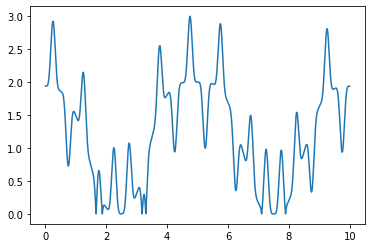

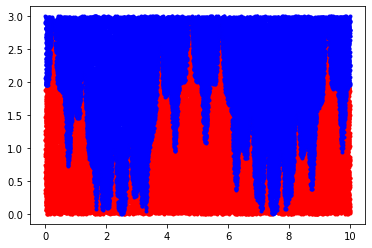

/home/oscar/anaconda3/envs/MUCD-CN/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/oscar/anaconda3/envs/MUCD-CN/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


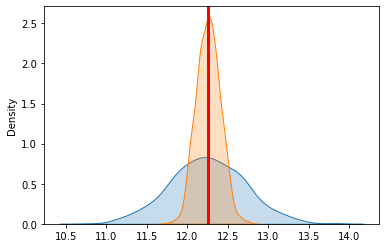

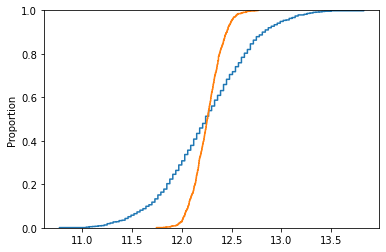

In [6]:
a = 0
b = 10
nsample = 50000

IMC,x,fx,y,accepted = montecarlo(f,a,b,nsample)
IMC,x,fx,y,accepted = (IMC[0],x[0],fx[0],y[0],accepted[0])
I = integrate.quad(f,0,10)

print('Integración:',I[0],'Estimación:',IMC)


plt.plot(x,fx)
plt.show()
plt.plot(x[accepted],y[accepted],'.r')
plt.plot(x[~accepted],y[~accepted],'.b')
plt.show()


nsample = 1000
IMC1 = montecarlo(f,a,b,nsample,1000)[0]
sns.distplot(IMC1, hist=False, kde=True, kde_kws = {'shade': True})

nsample = 10000
IMC2 = montecarlo(f,a,b,nsample,1000)[0]
sns.distplot(IMC2, hist=False, kde=True, kde_kws = {'shade': True})

plt.axvline(I[0],0,3,color='red',linewidth=3)
plt.show()

sns.ecdfplot(IMC1)
sns.ecdfplot(IMC2)

plt.show()

#plt.hist(IMC,bins=20,density=True)
#plt.show()

In [10]:
def g(x):
    return np.sqrt(1-x**2)

In [11]:
def montecarlo_media(g,a,b,nsample,N=1):
    x = np.random.rand(N,nsample)*(b-a)+a
    gx= g(x)
    IMC = np.mean(gx,1)*(b-a)
    return IMC

/home/oscar/anaconda3/envs/MUCD-CN/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/oscar/anaconda3/envs/MUCD-CN/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


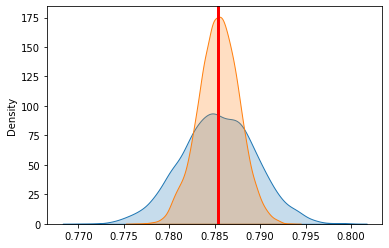

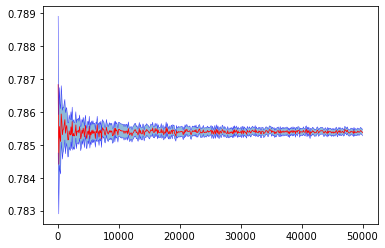

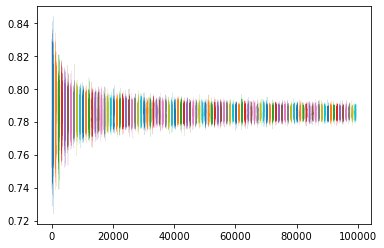

In [25]:
a = 0
b = 1

nsample = 10000
N = 5000

IMC_media = montecarlo_media(g,a,b,nsample,N)
IMC = montecarlo(g,a,b,nsample,N)[0]

sns.distplot(IMC, hist=False, kde=True, kde_kws = {'shade': True})

sns.distplot(IMC_media, hist=False, kde=True, kde_kws = {'shade': True})

plt.axvline(np.pi/4,0,3,color='red',linewidth=3)
plt.show()

simulations = 1000

data = np.concatenate([montecarlo_media(g,a,b,nsample,simulations) for nsample in np.arange(100, 50100, 100)])

df = pd.DataFrame(data={'samples':np.repeat(np.arange(100, 50100, 100), simulations), 'value':data})

df2 = df.groupby("samples").mean()
df2["dif"] = df.groupby("samples").std()*norm.interval(0.9975)[1]/np.sqrt(simulations)
df2["upper"] = df2["value"] + df2["dif"]
df2["lower"] = df2["value"] - df2["dif"]

plt.fill_between(x = df2.index,y1 = df2.lower, y2 = df2.upper, alpha=0.5)
plt.plot(df2.index, df2.value, 'r', linewidth=0.75)
plt.plot(df2.index, df2.upper, 'b', linewidth=0.5, alpha=0.75)
plt.plot(df2.index, df2.lower, 'b', linewidth=0.5, alpha=0.75)
plt.show()

for i in range(100):
    plt.plot(df.value.iloc[i*simulations:500 + i*simulations], linewidth=0.1)

plt.show()


In [4]:
def h(x):
    return np.abs(np.cos(50*x) + np.sin(20*x))

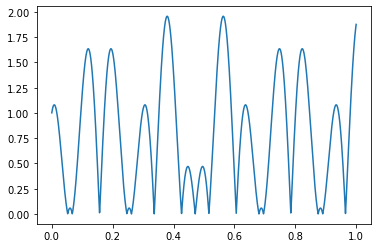

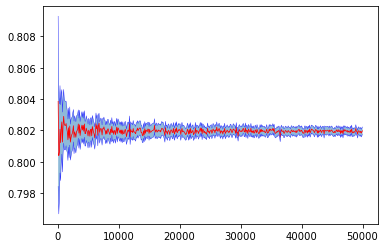

In [8]:
a = 0
b = 1

x = np.random.rand(10000)*(b-a)+a
x = np.sort(x)
hx = h(x)
plt.plot(x,hx)
plt.show()

simulations = 1000
data = np.concatenate([montecarlo_media(h,a,b,nsample,simulations) for nsample in np.arange(100, 50100, 100)])

df = pd.DataFrame(data={'samples':np.repeat(np.arange(100, 50100, 100), simulations), 'value':data})

df2 = df.groupby("samples").mean()
df2["dif"] = df.groupby("samples").std()*norm.interval(0.9975)[1]/np.sqrt(simulations)
df2["upper"] = df2["value"] + df2["dif"]
df2["lower"] = df2["value"] - df2["dif"]

plt.fill_between(x = df2.index,y1 = df2.lower, y2 = df2.upper, alpha=0.5)
plt.plot(df2.index, df2.value, 'r', linewidth=0.75)
plt.plot(df2.index, df2.upper, 'b', linewidth=0.5, alpha=0.75)
plt.plot(df2.index, df2.lower, 'b', linewidth=0.5, alpha=0.75)
plt.show()

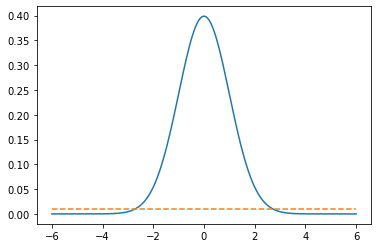

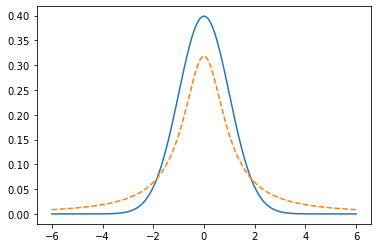

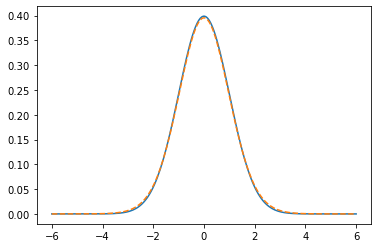

(array([  15.,  165.,  621., 1262., 1417.,  967.,  414.,  118.,   18.,
           3.]),
 array([0.46809617, 0.59048455, 0.71287294, 0.83526132, 0.95764971,
        1.08003809, 1.20242648, 1.32481486, 1.44720324, 1.56959163,
        1.69198001]),
 <BarContainer object of 10 artists>)

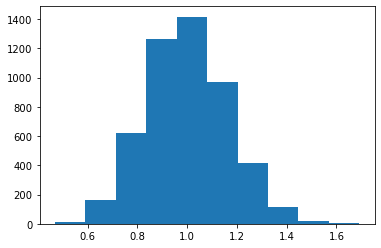

In [43]:
x = np.linspace(-6,6, 200)
nx = norm.pdf(x)
plt.plot(x, nx)
plt.plot(x, [1/100]*200, "--")
plt.show()

plt.plot(x, nx)
plt.plot(x, cauchy.pdf(x), "--")
plt.show()

plt.plot(x, nx)
plt.plot(x, t.pdf(x,30), "--")
plt.show()

nsample = 1000
simulaciones = 5000

IMC = montecarlo_media(norm.pdf, -50, 50, nsample, simulaciones)
plt.hist(IMC)
plt.show()

IMCcauchy = montecarlo_importancia(cauchy.pdf, lambda x: norm.pdf(x)/cauchy.pdf(x), -50, 50, nsample, simulaciones)
plt.hist(IMCcauchy)
plt.show()

IMCt = montecarlo_importancia(lambda x: t.pdf(x,30), lambda x: norm.pdf(x)/t.pdf(x,30), -50, 50, nsample, simulaciones)
plt.hist(IMCt)
plt.show()

print('numero de simulaciones cuyo estimador excede 1.5:', len(IMC[IMC>1.5]))
print(IMC[IMC>1.5])

In [50]:
print('numero de simulaciones cuyo estimador excede 1.5:', len(IMC[IMC>1.5]))
print(IMC[IMC>1.5])

numero de simulaciones cuyo estimador excede 1.5: 10
[1.53147604 1.55639403 1.54174903 1.55706747 1.51373419 1.60242373
 1.64119353 1.5229557  1.55219038 1.69198001]
